<a href="https://colab.research.google.com/github/subhamdash/deep-learning/blob/master/RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/Images"
annot = "/content/drive/My Drive/Airplanes_Annotations/Airplanes_Annotations"

In [2]:

import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Using TensorFlow backend.


airplane_148.jpg


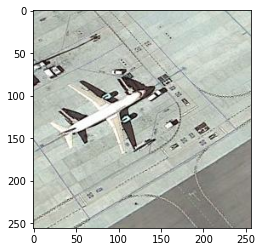

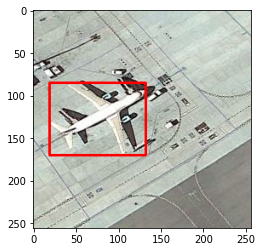

In [3]:
Index=148
filename = "airplane_"+str(Index)+".jpg"
print(filename)
img = cv2.imread(os.path.join(path,filename))
df = pd.read_csv(os.path.join(annot,filename.replace(".jpg",".csv")))
plt.imshow(img)

for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
            plt.figure()
            plt.imshow(img)

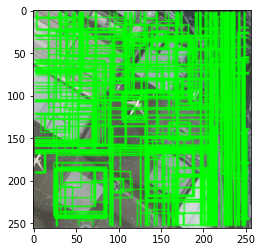

In [4]:

cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
im = cv2.imread(os.path.join(path,"42850.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()

im = cv2.imread(os.path.join(path,"42850.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#    print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)



In [0]:
def get_iou(bb1, bb2):
  # assuring for proper dimension.
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
  # calculating dimension of common area between these two boxes.
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
  # if there is no overlap output 0 as intersection area is zero.
    if x_right < x_left or y_bottom < y_top:
        return 0.0
  # calculating intersection area.
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
  # individual areas of both these bounding boxes.
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
  # union area = area of bb1_+ area of bb2 - intersection of bb1 and bb2.
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [0]:
train_images=[]
train_labels=[]
countin =0

inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside


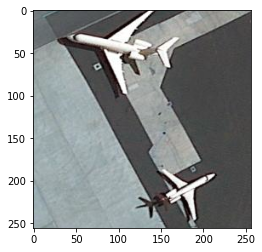

In [7]:
for e,i in enumerate(os.listdir(annot)):

    try:
        if i.startswith("airplane"):
            
          
            filename = i.split(".")[0]+".jpg"  #get th file name
            #print(e,filename)                  #print the filw name
            image = cv2.imread(os.path.join(path,filename))                     # read the image using open cv
            plt.imshow(image)                                                   # plot the image
            df = pd.read_csv(os.path.join(annot,i))                             # read the values of the bounding boxes
            #print(df)           
            gtvalues=[]                                                         # a List that will append some shit we will know in the further code

            for row in df.iterrows():                                           # This loop will draw alll the shitty boxes around the images of plane and that shit above will append as dictonary in the list
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)                                              # setting given image as base image
            ss.switchToSelectiveSearchFast()                                    # running selective search on bae image 
            ssresults = ss.process()                                            # processing to get the outputs
            #print(ssresults.shape)                                              # different type of bounding boxes we achieved from the SelectiveSearch
            imout = image.copy()                                                #copy the above image


            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            #print("GTVALUES=",len(gtvalues))
            #Iteretae through each obtained bounding boxes and given bounding boxes
            for e,result in enumerate(ssresults):                               # bounding boxes we achieved from the SelectiveSearch
                if e < 2000 and flag == 0:                                      # till 2000 to get top 2000 regions only
                    for gtval in gtvalues:                                      # all pre-given bounding boxes
                        x,y,w,h = result                                        # dimensions achieved from the SelectiveSearch

                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})  # calculating IoU for each of the proposed regions
                        if counter < 30:                                        # getting only 30 psoitive examples
                            if iou > 0.70:                                      # IoU or being positive is 0.7
                                timage = imout[x:x+w,y:y+h]
                                #plt.imshow(timage)
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                #plt.imshow(resized)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1              # to insure we have collected all psotive examples
                        if falsecounter <30:      # 30 negatve examples are allowed only
                            if iou < 0.3:         # IoU or being negative is 0.3
                                timage = imout[x:x+w,y:y+h]
                                #plt.imshow(timage)
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1             #to ensure we have collected all negative examples
                    if fflag == 1 and bflag == 1:  
                        print("inside")
                        flag = 1  
                             # to signal the complition of data extaction from a particular image
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

In [10]:
len(train_images)

30229

Label of the images is 1


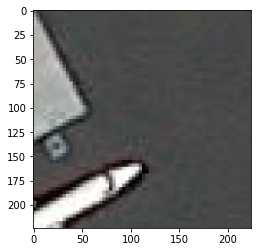

In [24]:
l=30222
plt.imshow(train_images[l])
print("Label of the images is",train_labels[l])

Label of the images is 0


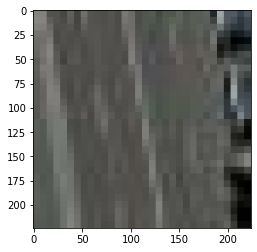

In [25]:
l=3022
plt.imshow(train_images[l])
print("Label of the images is",train_labels[l])

In [39]:
c=0
for i in train_labels:
  if i==1:
    c+=1
print(c)

9289


In [0]:
X_new = np.array(train_images)
Y_new = np.array(train_labels)

In [0]:
from keras.layers import Dense
from keras import Model
from keras import optimizers

In [42]:
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)


553467904/553467096 [==============================] - 6s 0us/step


In [43]:

for layer in vgg.layers[:-2]:
  layer.trainable = False
x = vgg.get_layer('fc2')
last_output =  x.output
x = tf.keras.layers.Dense(2,activation = 'sigmoid')(last_output)  
model = tf.keras.Model(vgg.input,x)
model.compile(optimizer = "adam", 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [83]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model_final = Model(input = vggmodel.input, output = predictions)
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])
model_final.summary()



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(Y_new)


Tensor("strided_slice_4:0", shape=(None, 1), dtype=float32)


In [0]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


In [48]:
model.fit(X_new,Y,batch_size = 64,epochs = 10, verbose = 1,validation_split=.05,shuffle = True)

Epoch 1/10
449/449 [==============================] - 266s 592ms/step - loss: 0.6379 - acc: 0.8158 - val_loss: 0.3821 - val_acc: 0.8413
Epoch 2/10
449/449 [==============================] - 258s 574ms/step - loss: 0.3163 - acc: 0.8593 - val_loss: 0.4089 - val_acc: 0.8095
Epoch 3/10
449/449 [==============================] - 259s 576ms/step - loss: 0.2692 - acc: 0.8853 - val_loss: 0.5216 - val_acc: 0.8069
Epoch 4/10
449/449 [==============================] - 259s 576ms/step - loss: 0.2390 - acc: 0.8982 - val_loss: 0.5509 - val_acc: 0.8022
Epoch 5/10
449/449 [==============================] - 259s 576ms/step - loss: 0.2143 - acc: 0.9109 - val_loss: 0.5759 - val_acc: 0.8036
Epoch 6/10
449/449 [==============================] - 258s 576ms/step - loss: 0.1916 - acc: 0.9216 - val_loss: 0.7023 - val_acc: 0.8108
Epoch 7/10
449/449 [==============================] - 257s 572ms/step - loss: 0.1764 - acc: 0.9296 - val_loss: 0.7066 - val_acc: 0.7844
Epoch 8/10
449/449 [============================

In [0]:
model.save_weights("my_model_weights.h5")

In [99]:

svm_image = [];
svm_label = [];
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("airplane_0"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3]) 
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
                timage = image[x1:x2,y1:y2]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                svm_image.append(resized)
                svm_label.append([1,0])
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if falsecounter <5:
                            if iou < 0.3:
                                timage = imout[x:x+w,y:y+h]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                svm_image.append(resized)
                                svm_label.append([0,1])
                                falsecounter += 1
                        else :
                            flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 airplane_007.jpg
3 airplane_086.jpg
8 airplane_068.jpg
12 airplane_072.jpg
14 airplane_054.jpg
15 airplane_092.jpg
18 airplane_046.jpg
27 airplane_042.jpg
28 airplane_031.jpg
42 airplane_063.jpg
44 airplane_061.jpg
48 airplane_038.jpg
49 airplane_040.jpg
50 airplane_059.jpg
56 airplane_080.jpg
57 airplane_065.jpg
60 airplane_062.jpg
70 airplane_088.jpg
71 airplane_012.jpg
74 airplane_084.jpg
461 airplane_098.jpg
468 airplane_036.jpg
470 airplane_022.jpg
474 airplane_008.jpg
480 airplane_035.jpg
483 airplane_060.jpg
488 airplane_013.jpg
493 airplane_078.jpg
502 airplane_049.jpg
504 airplane_015.jpg
510 airplane_016.jpg
511 airplane_058.jpg
516 airplane_010.jpg
517 airplane_076.jpg
524 airplane_075.jpg
525 airplane_005.jpg
529 airplane_024.jpg
538 airplane_004.jpg
544 airplane_041.jpg
547 airplane_095.jpg
553 airplane_093.jpg
558 airplane_089.jpg
564 airplane_083.jpg
566 airplane_023.jpg
568 airplane_037.jpg
570 airplane_014.jpg
571 airplane_002.jpg
573 airplane_033.jpg
575 airplane_06

In [100]:
#adding svm to last layer
x =model.get_layer('fc2').output
Y = tf.keras.layers.Dense(2)(x)
final_model = tf.keras.Model(model.input,Y)
final_model.compile(loss='hinge',
              optimizer='adam',
              metrics=['accuracy'])
final_model.summary()
final_model.load_weights('my_model_weights.h5')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [2]:

hist_final = final_model.fit(np.array(svm_image),np.array(svm_label),batch_size=32,epochs = 20,verbose = 1,shuffle = True,validation_split = 0.05)

NameError: ignored

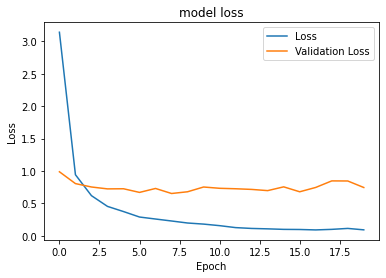

<Figure size 432x288 with 0 Axes>

In [54]:

import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist_final.history['loss'])
plt.plot(hist_final.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

In [0]:
image = cv2.imread(os.path.join(path,'airplane_020.jpg'))
ss.setBaseImage(image)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()

imOut = image.copy()
boxes = []
count = 0
for e,result in enumerate(ssresults):
  if e < 50:
    x,y,w,h = result
    timage = imout[x:x+w,y:y+h]
    resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
    resized = np.expand_dims(resized,axis = 0)
    out = final_model.predict(resized)
    print(e,out)
    if(out[0][0]<out[0][1]):
      boxes.append([x,y,w,h])
      count+=1

for box in boxes:
    x, y, w, h = box
    print(x,y,w,h)
    imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
    plt.figure()

plane


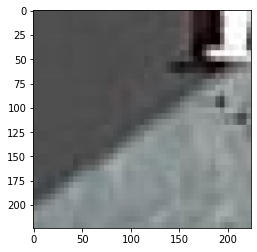

In [74]:
im = X_new[9]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model.predict(img)
if out[0][0] < out[0][1]:
    print("plane")
else:
    print("not plane")

In [57]:
for box in boxes:
    x, y, w, h = box
    print(x,y,w,h)
    imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
    plt.figure()

198 208 58 48
120 129 32 24
111 142 27 23
0 71 105 58
145 228 47 28
42 63 56 50


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

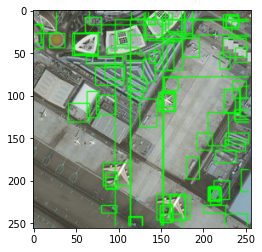

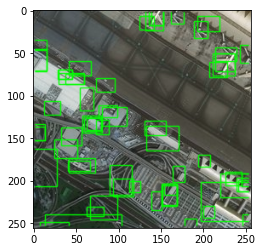

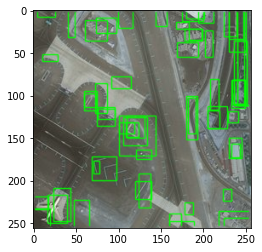

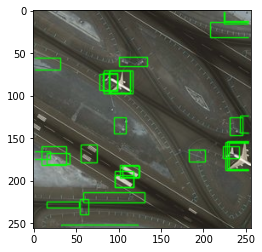

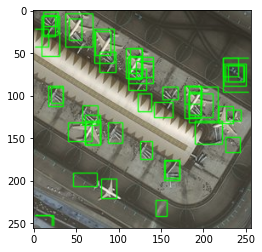

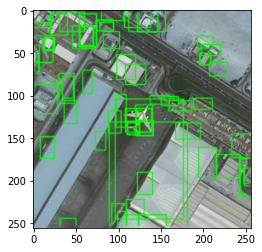

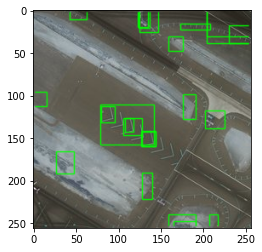

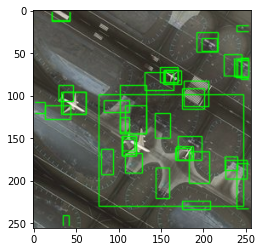

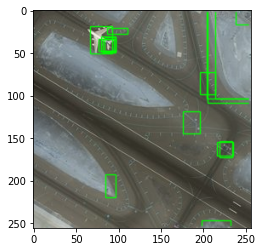

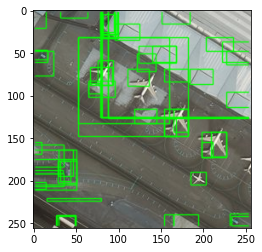

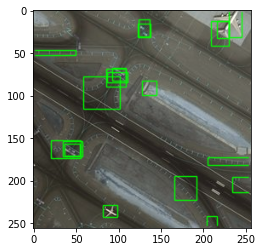

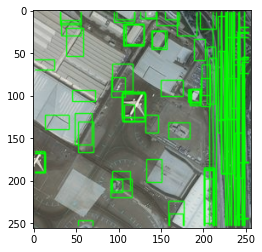

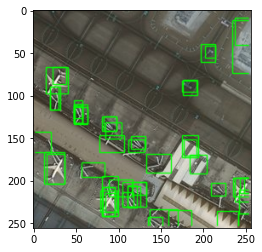

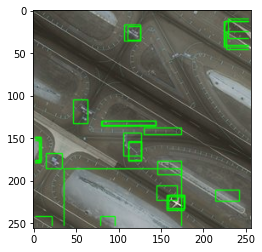

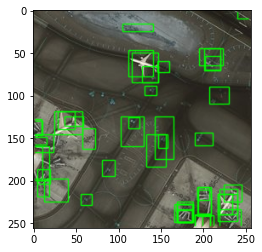

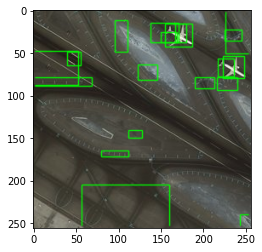

In [81]:
z=0
for e,i in enumerate(os.listdir(path)):
    if i.startswith("4"):
        z += 1
        img = cv2.imread(os.path.join(path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model.predict(img)
                if out[0][0] > 0.75:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)

In [0]:
!cp /content/my_model_weights.h5 /content/drive/My\ Drive